# Cubisima.com: A Peek At Cuba's (Re-)Emerging Real Estate Market

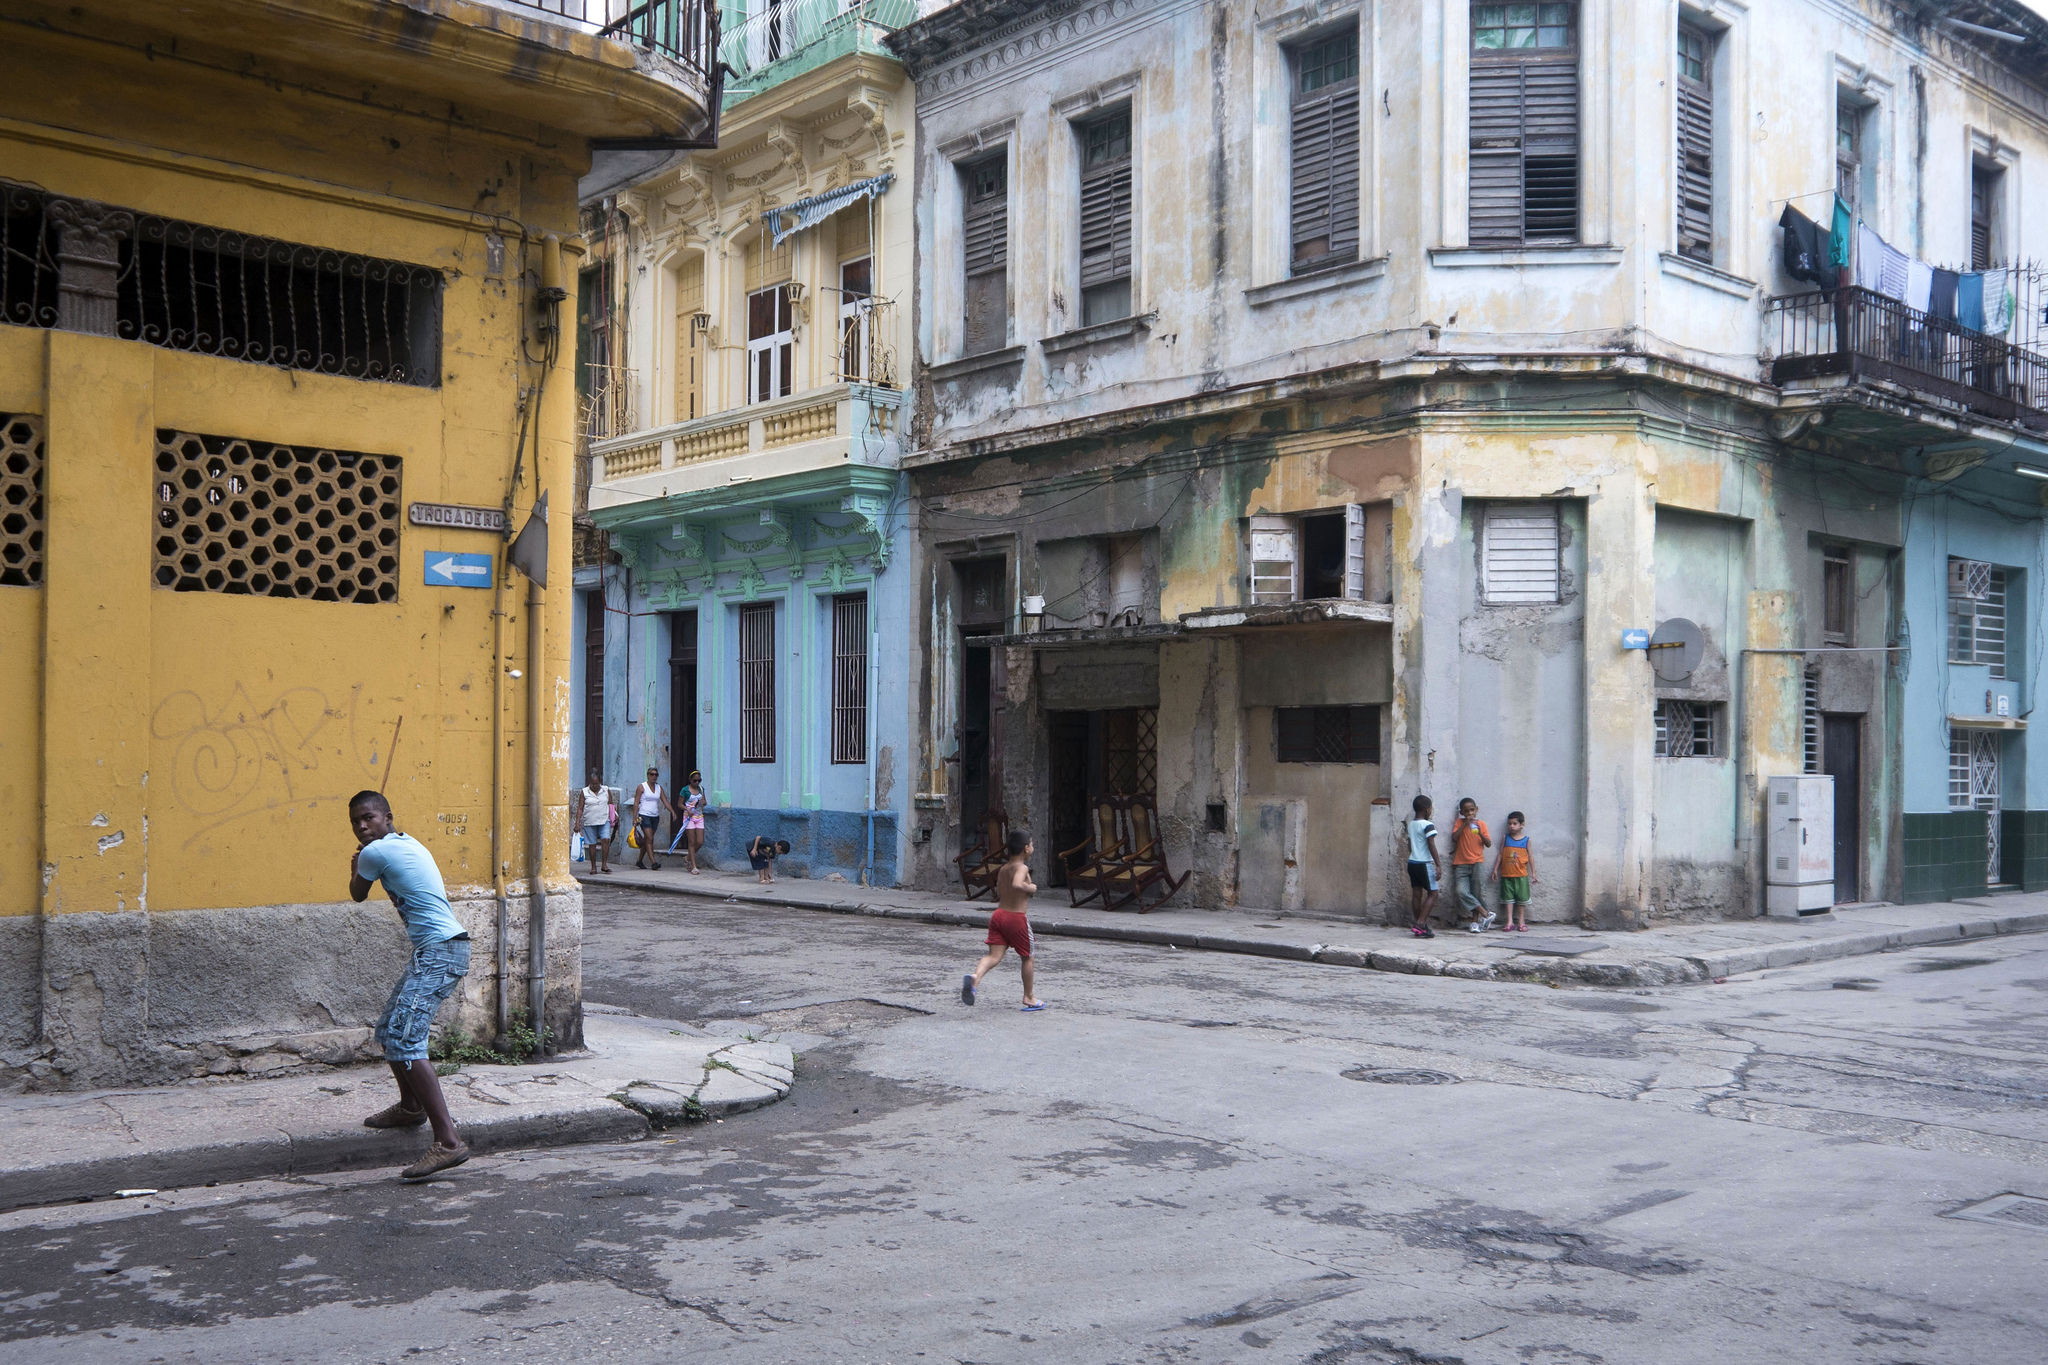

In [41]:
from IPython.display import Image
Image(url='https://farm3.staticflickr.com/2927/14153913565_3bcca9e3b3_k_d.jpg', embed=True)

credit: [Brian Ledguard](https://www.flickr.com/photos/ledgard/14153913565/in/photolist-8cvfYW-6cv5cF-nwG145-r2Ej71-KLntY-q5WfQk-8E9q6Y-qYSzwB-qYEJZu-nheH64-6cPSzE-nyJJeQ-r4egXH-nheLT7-dePQuN-nheTBf-KkPpu-6dq2pw-q7W88V-nAviXM-oLFMfq-nyJp5D-nyJS7J-6ci2xK-reoBTx-pqTwWW-qFN38B-qQW1hL-nyJpSF-oUmfpN-nheR9G-5DAJWT-5T33DV-3tonQ-yPdKf-6pyoif-nheNit-nwFDPh-nwFKnG-nyJvov-e7cNq-dVz1Vo-njUFJB-bSeBbx-nhf28N-mNDTZe-8Xskvy-nheKfh-dT1RFR-nyJQcS/)



At the close of 2011, Cuba took the biggest step towards capitalism since the Revolution: it revived its real estate market.

After fifty years, ordinary Cubans were once again able to buy and sell their homes. Billions of dollars of property, undervalued for decades, was suddenly open for sale.

### Why Reform Matters

The historical significant of these reforms cannot be overstated.

The liberalization of real estate in Cuba isn't just a big deal because real estate is a huge slice of the economy, and that slice is now governed by markets. 

It's a big deal because the free exchange of property is the very foundation of a market economy. For the an economy to thrive, land must be allocated flexibly: businesses must be allowed to buy space to house their economic activities. People must be able to move close to those jobs.

The potential impacts on the island are profound. Property tends to generate wealth, which could be refunneled as capital to kickstart Cuba's economy. That could lift living standards, but also concentrate wealth in the hands of a few. The re-emergence of class could reshape cities, as the wealthy move to more desirable neighbhorhoods and the poor are left behind.


### Cuba's Peculiar New Market

For now, however, Cuba's fledgling real estate market is off to a rather unusual start:

* Despite widespread poverty, 84% of households own their homes.

* There's no history of transactions to guide prices, so prices for comparable properties can vary wildly.

* There's no mortgage lending, so all purchases must be done in cash. But nearly nobody has cash. That hampers demand in a big way: people can't afford to buy their first house to start a family, or upgrade their small apartment for a bigger one.

* Most buyers are older people who want to buy a smaller house after selling their current one, or locals receiving money from family abroad. This bifurcated demand has affect supply: some sellers are "serious", intent on moving or downsize their homes, other post inflated prices just in case a foreigned-backed seller comes along.

The result: prices are high for the average Cuban, and most can't afford to buy - despite the vast majority being owners.

### Economic Reform: There's An App for That
Most of the world's socialist economies liberalized after the fall of the Berlin Wall. But because Raul Castro initiated reforms in 2011, instead of 1991, Cuba's real estate market was (re)born digital.

Online marketplaces cropped up within weeks. That means data exhaust - and an unprecendeted oppotunity to observe the re-emergence of a real estate market in a country that hasn't had one in over half a century.

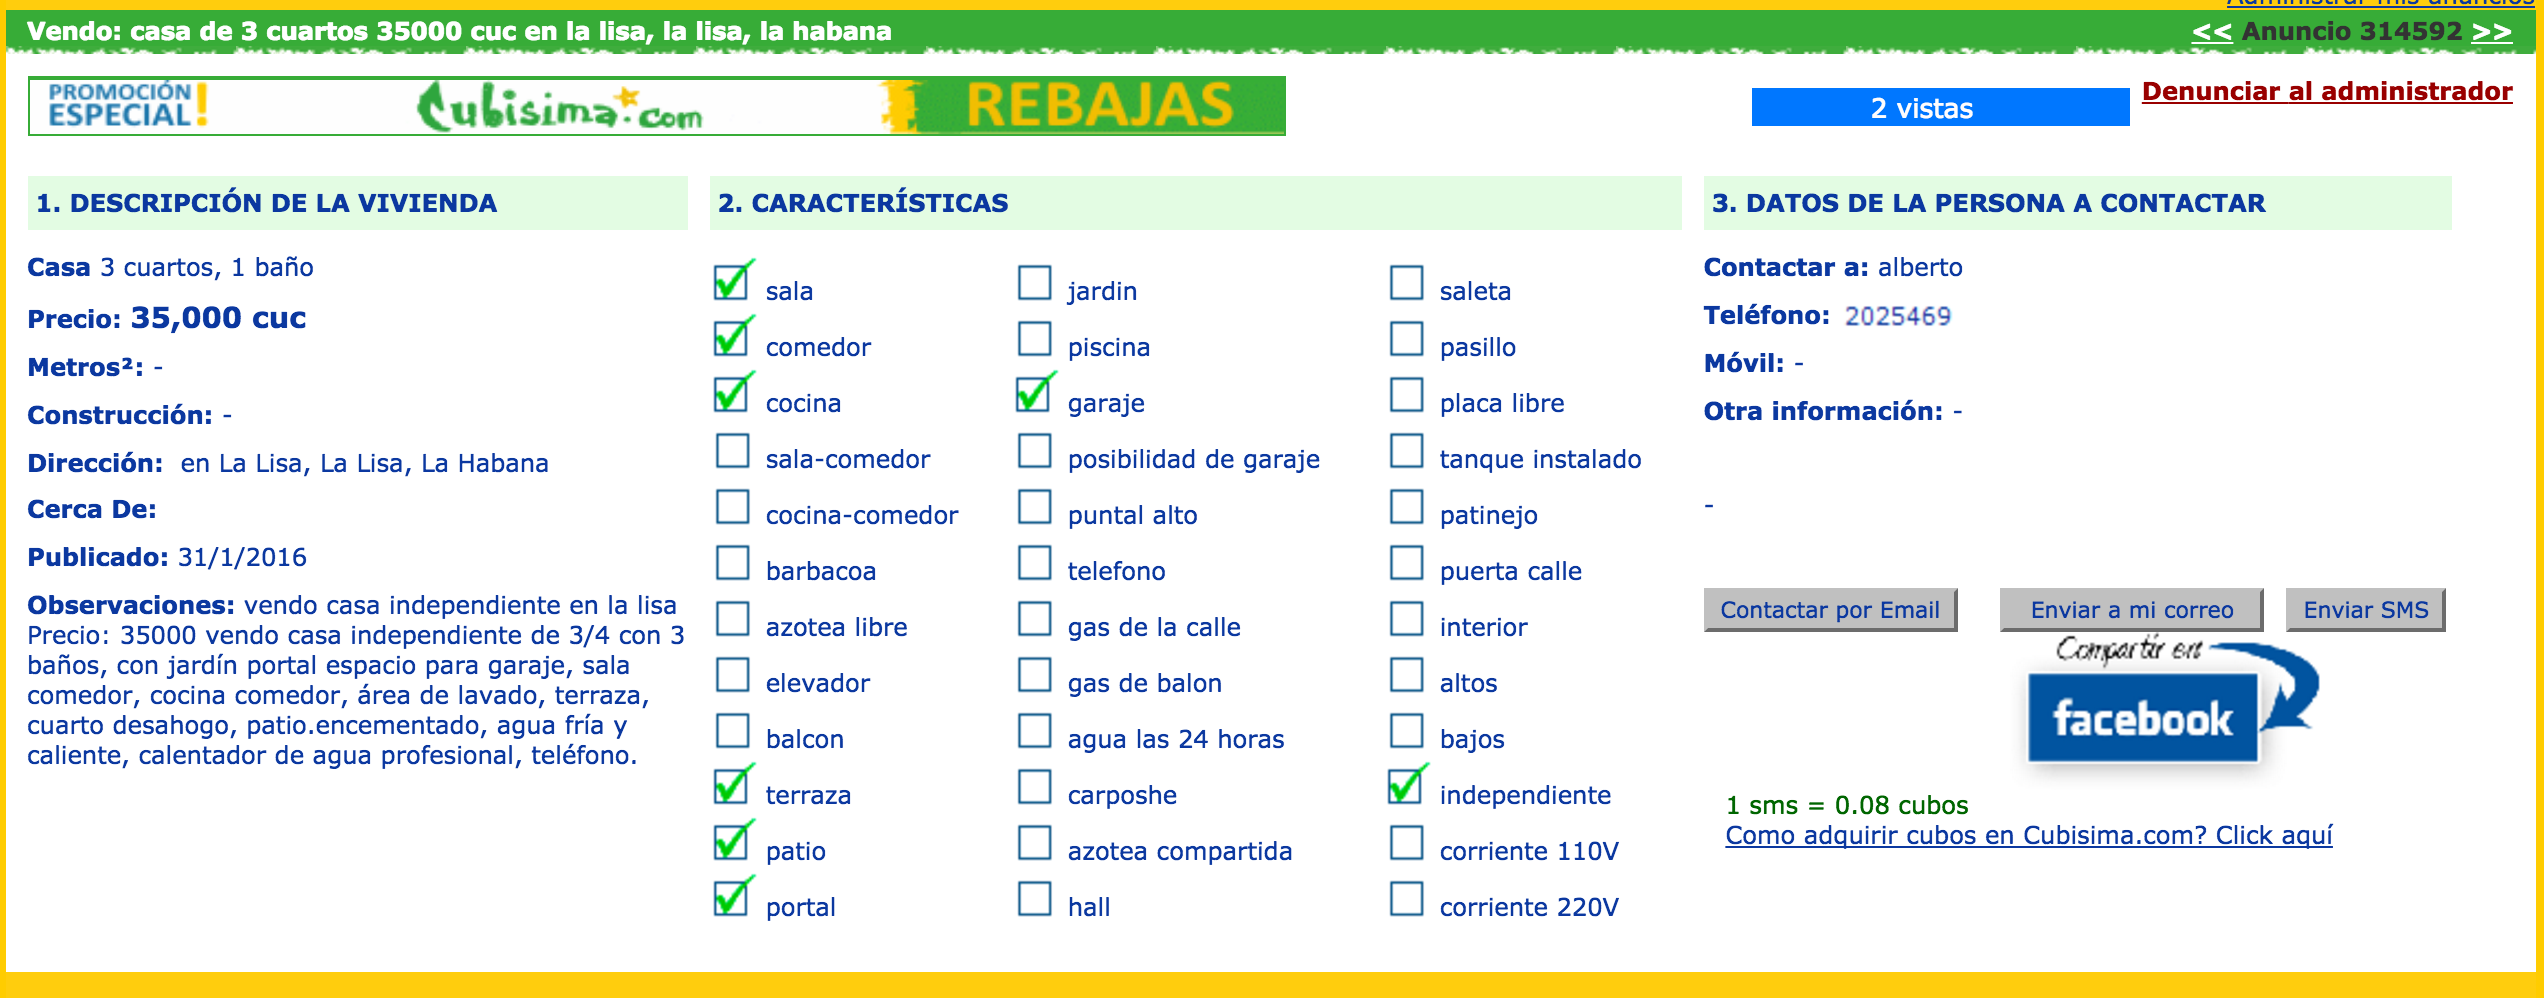

In [44]:
 Image(filename='cubisima_listing_screenshot.png')

[A typical listing on Cubisima.com](http://www.cubisima.com/casas/casa-de-3-cuartos-35000-cuc-en-la-lisa-la-lisa-la-habana!314592.htm)
    

Cubisima.com is Cuba's answer to craigslist - an online classifieds service listing everything from laptops to short-term gigs. 

The property listings are full of interesting information, including:
- The type of property for sale: houses, apartments, etc.
- The number of bedrooms, bathrooms, and (ocassionally) the floor area in meters squared
- The asking price
- The neighborhood, city, and province the property is located in
- The date the listing was initially published
- Property amenities covering everything from "running water" to "barbeque pit"
- Seller's name and number 
- Photographs of the property (optionally)

### From Website to Dataset

Listings don't appear to be taken off the site after they are posted. 

So I wrote a scraper to download 50,000 listings posted on the site between summer 2011, right before the reform, and summer 2014. (I'm currently working on getting data for the last year and a half.)

Then I wrote a script to extract a listings details from the HTML of these pages.


This resulting dataset will allow us take the first quantiative peek at Cuba's new real estate market.

What sort of market emerges where there isn't any? Is it growing? What type of property is being sold? Hold much is it going for? And what are the key drivers of price?

Without further ado, let's read in the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
sns.set(style="whitegrid")
sns.set_color_codes('pastel')
from sklearn import cross_validation
from sklearn import metrics

In [2]:
raw_listings = pd.read_csv('../data/listings.csv')

## How many properties have been listed on Cubisima.com since the reforms?

In [3]:
def convert_pub_date(listings):
    '''
    Convert publication date to daytime. Listings posted on day scraper
    ran display time of posting - i.e. "8:35 am" - instead of the date ~
    24/12/2011. These must be transformed.
    '''
    # Get datetime of when the scraper ran.
    listings = listings.copy() # So this function can be rerun.
    listings_no_today = listings[~listings.pub_date.str.contains('am')]
    today = pd.to_datetime(listings_no_today.pub_date).max()
    # Set strings with format '8:35 am' to scraper run date.
    has_am = listings.pub_date.str.contains('am')
    listings.loc[has_am, 'pub_date'] = today
    # Convert all publication dates to to datetime.
    listings.loc[:,'pub_date'] = pd.to_datetime(listings['pub_date'])
    return listings

In [4]:
# Convert publication date to datetime.
listings_dt = convert_pub_date(raw_listings)
# Missing some listings after July 2014, so remove them.
lt_aug_2014 = listings_dt.pub_date < '08-01-2014'
gt_nov_2011 = listings_dt.pub_date >= '11-01-2011'
listings_since_reform = listings_dt[gt_nov_2011 & lt_aug_2014]

In [5]:
listings_since_reform.shape[0]

60365

**60,365 properties** were advertised on Cubisima.com between Nov 2011, when the reform were announced, and July 2014, the last month we current have data for.

## How much of the market does this represent?

By comparison, the Cuban government reported **80,000 completed property sales** in the first 11 months of 2013, according to a [2014 study](http://www.brookings.edu/~/media/research/files/reports/2014/02/21-cuba-real-estate/phil-peters-cubas-new-real-estate-market.pdf) by the Brookings Institution.

It's safe to assume that in these early days, only a small fraction of properties advertised on the site end up selling. (We can't tell from listings data which properties actually sold.) And it's very possible that some properties were listed multiple times in 2013. (I haven't yet tried to identify and remove duplicate listings.)

But the fact that 3 properties were listed for every 4 that sold across the island during that period suggest we may be capturing a decent sample of the market. If we assume one of every 50 properties listed on Cubisima.com eventually sold, then 1.5% of properties purchased during the period appeared on the site.

## Has the number of listings grown over time?

To whatever extent Cubisima reflects Cuba, a growing number of classifieds on the site could reflect the growth of the island's fledging property market. So next, let's take a look at listings over time.

In [6]:
# Make time series of listings per week.
listings_since_reform_ts = listings_since_reform.set_index(listings_since_reform.pub_date)
ts_listing_counts = listings_since_reform_ts['id'].resample('W', how='count')

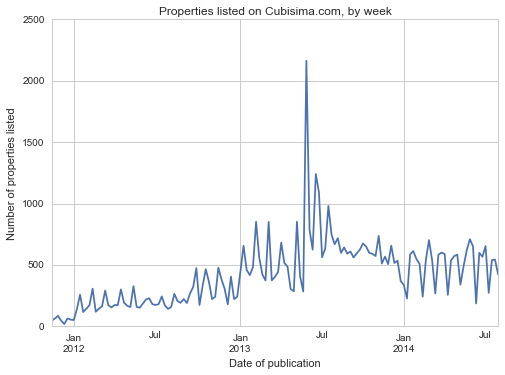

In [7]:
# Plot time series.
ts_listing_counts.plot()
plt.xlabel('Date of publication')
plt.ylabel('Number of properties listed')
plt.title('Properties listed on Cubisima.com, by week')

This plot shows the number of listings posted to the site every week.

Though not visible here, the earliest listings on Cubisima date from July 2011, months before property sales became legal on the island. (There are too few listings from this pre-reform period, however, for us to compare properties before vs. after.)


New listings jumped to 100-200 per week immediately Raul Castor announced the reforms in November 2011. They grew slowly during 2012, and then roughly doubled at the start of 2013. As of mid 2014, the number of new listings per week had stabilized at around 400 listings per week.

Notice, however, that listings tend to spike once month, and that size of this periodic variation grows over the years.

Before we can dig further, we must clean our dataset.

In [8]:
def clean_listings(listings):
    '''Coerce columns to have property data types.'''
    # Convert asking price from string to float. 
    # This dropes ~13K/63K listings with no asking price info.
    listings.loc[:, 'price'] = listings.price.str.replace(',','').astype(float).copy()
    # Remove price outliers from dataset.
    listings = listings[listings.price < 500000]
    # Convert blank listings notes to NaN.
    has_dash = (listings.notes == '-')
    listings.loc[has_dash, 'notes'] = np.NaN
    # The site allows people to list half rooms. Take the floor to simplify the data.
    listings.loc[:, 'num_bed'] = listings.num_bed.apply(lambda s: int(np.floor(s)))
    # Translate amenity columns to english.
    amenity_dict = {'azotea compartida': 'amenity_shared_rootop', 'balcon': 'amenity_balcony', 'corriente 220V': 'amenity_electricity_200V',
                    'sala-comedor': 'amenity_combined_living_and_dining_room', 'cocina': 'amenity_kitchen', 'piscina': 'amenity_pool',
                    'agua las 24 horas': 'amenity_water_all_day', 'garaje': 'amenity_garage', 'gas de balon': 'amenity_gas_tank',
                     'independiente': 'amenity_independent', 'patio': 'amenity_patio', 'tanque instalado': 'amenity_water_tank',
                     'bajos': 'amenity_bajos', 'telefono': 'amenity_telephone', 'placa libre': 'amenity_placa_libre',
                     'posibilidad de garaje': 'amenity_garage_possible', 'pasillo': 'amenity_hallway',
                     'corriente 110V': 'amenity_electricity_110V', 'interior': 'amenity_interior', 'puntal alto': 'amenity_high_ceilings',
                     'elevador': 'amenity_elevator', 'azotea libre': 'amenity_free_roof', 'terraza': 'amenity_terrace',
                     'patinejo': 'amenity_ventilation_shaft', 'puerta calle': 'amenity_street_facing_door', 'portal': 'amenity_portal',
                     'gas de la calle': 'amenity_gas_line', 'cocina-comedor': 'amenity_combined_kitchen_dinning_room', 'hall': 'amenity_hall',
                     'altos': 'amenity_altos', 'saleta': 'amenity_small_room', 'comedor': 'amenity_dining_room',
                     'barbacoa': 'amenity_barbeque', 'jardin': 'amenity_garden', 'carposhe': 'amenity_carposhe', 'sala': 'amenity_living_room'}
    listings.rename(columns=amenity_dict, inplace=True)
    # Translate property types to english.
    property_dict = {'property_type': {'Casa': 'House', 
                                       'Apartamento': 'Apartment',
                                       'Habitacion': 'Room',
                                       'Terreno': 'Empty Lot',
                                       'Prop  horizontal': 'Co-op'
                                      }}
    listings.replace(to_replace=property_dict, inplace=True)
    return listings

In [9]:
def make_additional_variables(listings):
    '''Construct additional listing variables from scraped data.'''
    # Construct day of week, month, and year variables.
    listings.loc[:, 'year'] = listings.pub_date.dt.year.astype(str)
    listings.loc[:, 'month'] = listings.pub_date.dt.month.astype(str)
    listings.loc[:, 'day_of_week'] = listings.pub_date.dt.dayofweek.astype(str)
    # Construct neighborhood and city variables.
    has_location = ~listings.location.isnull()
    listings.loc[:, 'province'] = listings[has_location].location.apply(lambda v: str(v).split(', ')[-1])
    listings.loc[:, 'city'] = listings[has_location].location.apply(lambda v: str(v).split(', ')[-2].split('en ')[-1])
    return listings

In [10]:
listings = make_additional_variables(clean_listings(listings_since_reform))

/Users/jpvelez/anaconda/envs/cubisima/lib/python3.5/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/jpvelez/anaconda/envs/cubisima/lib/python3.5/site-packages/pandas/core/frame.py:2697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/Users/jpvelez/anaconda/envs/cubisima/lib/python3.5/site-packages/pandas/core/generic.py:3050: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

In [11]:
listings.shape

(47740, 58)

Just over 20% of listings on Cubisima.com lack price information, so let's drop those records and focus on the universe of properties with listed prices. That leaves us with **47,740 properties** to analyze.

Let's also make some new variables. We can derive the day of week, month, and year a listing was first posted on the site from its publication date. And we can extract the city and provicence where each property is location from the "location" field of listings.

## What kind of properties are being listed on the site?

Cubans haven't been able to sell their residences since the early 1960s. Now that they suddenly can, what types of properties are they putting on the market?


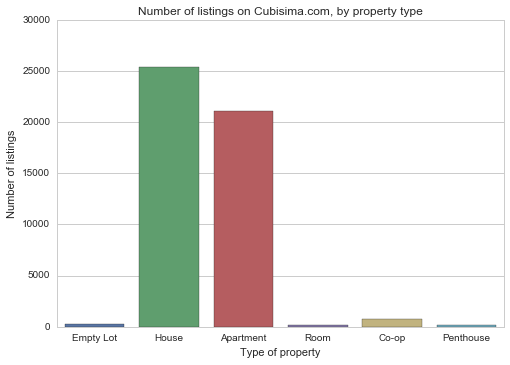

In [12]:
sns.countplot(listings.property_type)
plt.title('Number of listings on Cubisima.com, by property type')
plt.xlabel('Type of property')
plt.ylabel('Number of listings')

In [13]:
(listings.property_type.value_counts() / listings.shape[0]) * 100

House        53.206954
Apartment    44.178886
Co-op         1.499791
Empty Lot     0.578132
Room          0.278592
Penthouse     0.257646
Name: property_type, dtype: float64

Houses and apartments make up **97% of properties** on the site.

"Horizonal properties," Cuba's answer to Co-op apartments, are in (very distant) third place, with 1.5% of listings. Empty lots, single rooms, and luxury penthouses occasionally make an appearance.

Since houses and apartments dominate our dataset, let's focus on them and drill down further.

(-0.5, 7.5)

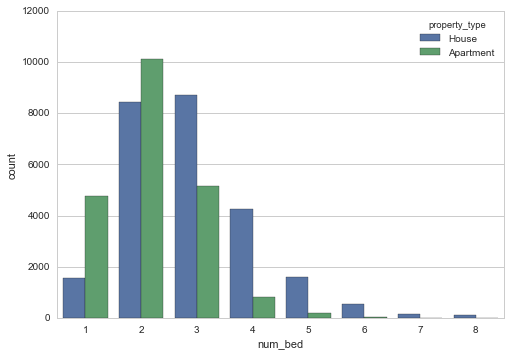

In [20]:
is_house = listings.property_type == 'Apartment'
is_apt = listings.property_type == 'House'
houses_and_apts = listings[is_house | is_apt]
sns.countplot('num_bed', hue='property_type', data=houses_and_apts)
plt.xlim((-.5,7.5))

(-0.5, 5.5)

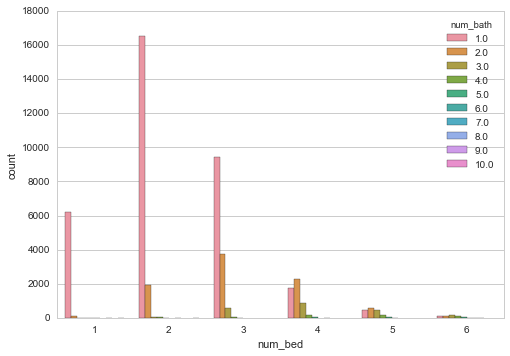

In [15]:
sns.countplot('num_bed', hue='num_bath', data=houses_and_apts)
plt.xlim((-.5,5.5))

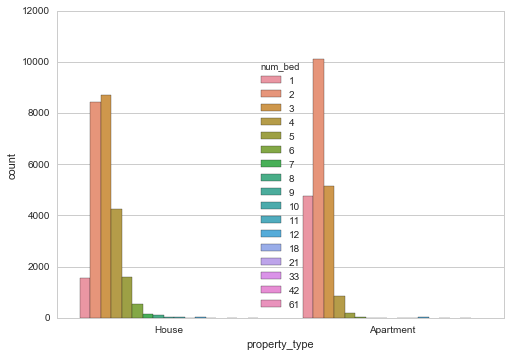

In [16]:
sns.countplot('property_type', hue='num_bed', data=houses_and_apts)

/Users/jpvelez/anaconda/envs/cubisima/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


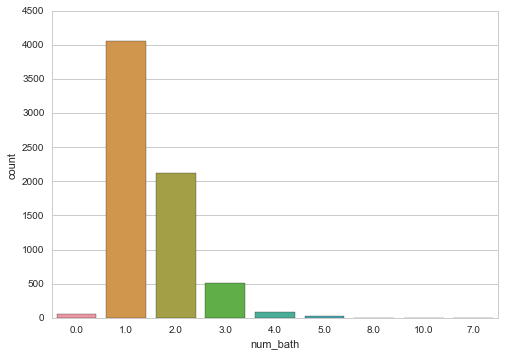

In [254]:
sns.countplot(listings.num_bath)

## How much are properties selling for?

(0, 500000)

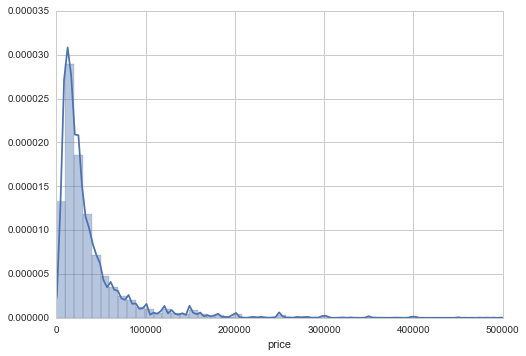

In [17]:
sns.distplot(listings.price)
plt.xlim((0,500000))

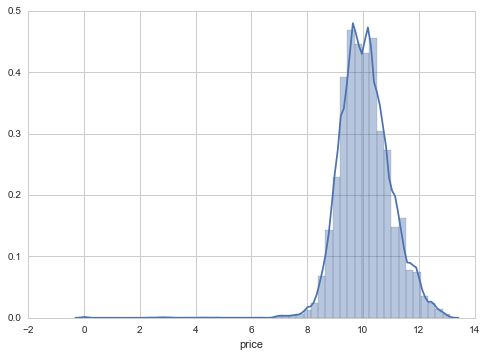

In [18]:
sns.distplot(np.log(listings.price))

## How have prices changed over time?

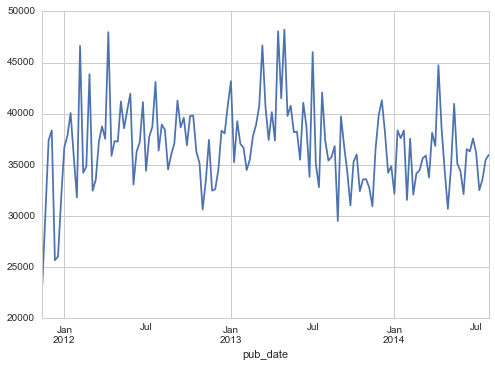

In [21]:
listings_dt = listings.set_index(listings.pub_date)
listings_dt['price'].resample('W', how='mean').plot()

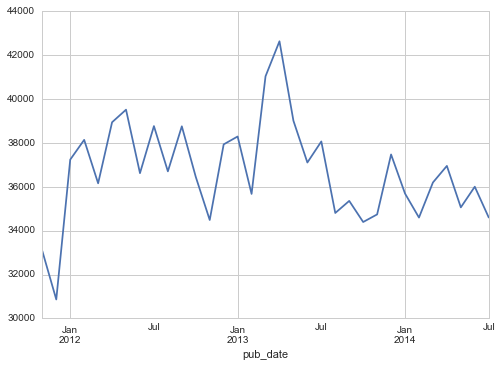

In [22]:
listings_dt['price'].resample('M', how='mean').plot()

## How does the size of a home affect its price?

In [23]:
#home_or_apt = (listings.property_type == 'Casa') | (listings.property_type == 'Apartamento')
#listings_home_apt = listings[home_or_apt]
# NOTE: 8510 listings have meters_squared values, 7730 are less than 500
has_meters = ~listings.meters_squared.isnull()
meters_lt_500 = listings.meters_squared < 500
listings_with_meters = listings[has_meters & meters_lt_500]
listings_with_meters.shape[0]

7405

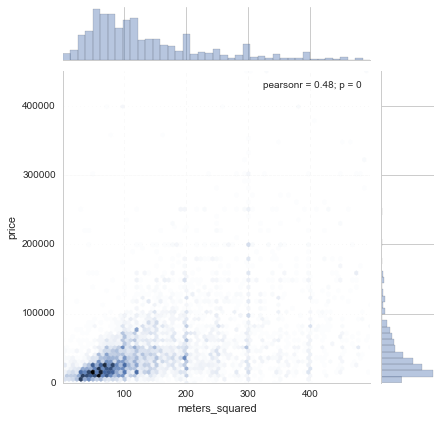

In [24]:
sns.jointplot('meters_squared', 'price', listings_with_meters, kind='hex')

In [26]:
listings[has_meters].shape

(8146, 58)

In [27]:
listings[has_meters & meters_lt_500].shape

(7405, 58)

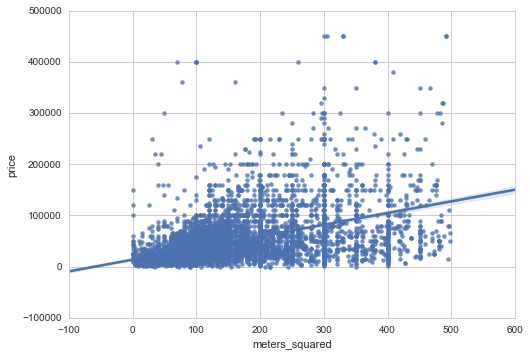

In [28]:
sns.regplot('meters_squared', 'price', listings_with_meters)

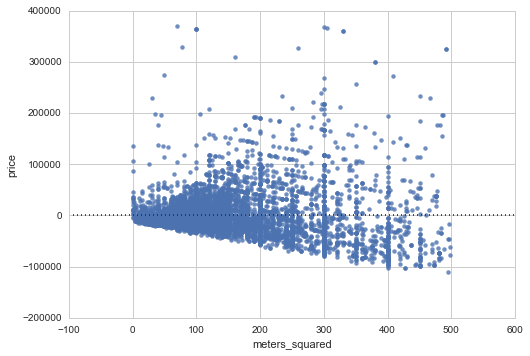

In [30]:
sns.residplot('meters_squared', 'price', listings_with_meters)

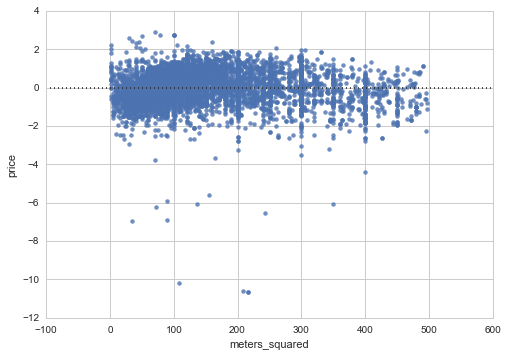

In [31]:
sns.residplot('meters_squared', np.log(listings_with_meters.price), listings_with_meters)

## How do prices vary by property type?

(0, 250000)

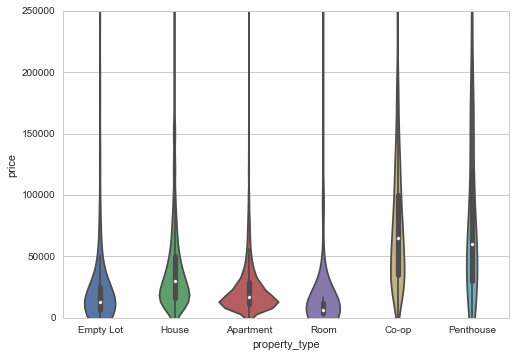

In [33]:
sns.violinplot(x=listings.property_type, y=listings.price)
plt.ylim((0,250000))

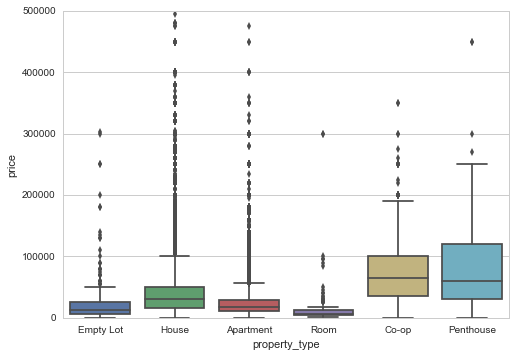

In [34]:
sns.boxplot(x=listings.property_type, y=listings.price)

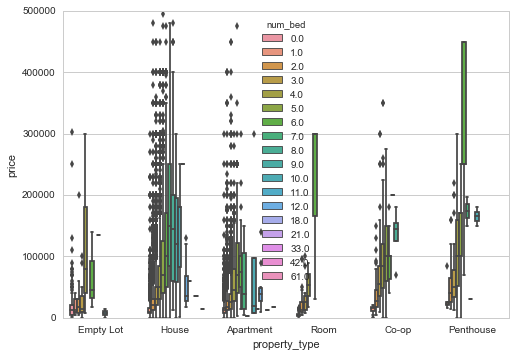

In [35]:
sns.boxplot(x=listings.property_type, hue=listings.num_bed.apply(np.floor), y=listings.price)

Houses have a higher mean and a heavier tail than apartments.
Penthouses cost more, and entire buildings the most.
Rooms and lots cost a lost less.

## How do prices vary by room?

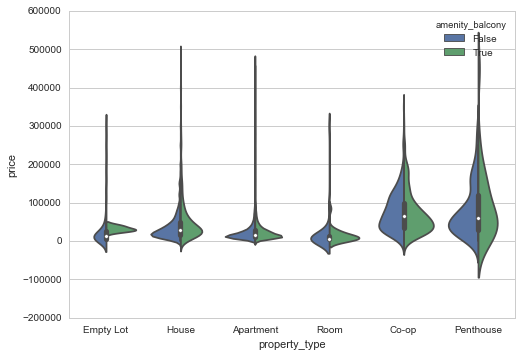

In [37]:
sns.violinplot(x=listings.property_type, hue=listings['amenity_balcony'], y=listings.price, split=True)

## Which property characteristics drive the price of real estate?

In [49]:
# Specify linear regression model. 
base_formula = '''price ~ property_type + num_bed + num_bath + city 
                  + province + day_of_week + month + year'''

# Construct formula of 36 property amenity boolean variables.
amenity_variables = [col_name for col_name in listings.columns.tolist() if 'amenity' in col_name]
amenities_formula =' + '.join(amenity_variables)

formula = base_formula + ' + ' + amenities_formula
y, X = dmatrices(formula, data=listings, return_type='dataframe')

In [50]:
# Regress price on property characteristics, amenities, location, and time variables.
model = sm.OLS(y, X)
results = model.fit()

# Property represented by intercept
# Property type: Apartment
# City: 10 de Octubre (borough of havana)
# Region: Artemisa (province next to havana)
# Day of week: Monday
# Month: January
# Year: 2011 (right after market started)

# Print regression diagnostics.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     249.1
Date:                Mon, 01 Feb 2016   Prob (F-statistic):               0.00
Time:                        01:05:20   Log-Likelihood:            -5.5566e+05
No. Observations:               47350   AIC:                         1.112e+06
Df Residuals:                   47134   BIC:                         1.114e+06
Df Model:                         215                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------

In [370]:
results.params.apply(lambda x: '%.3f' % x)

Intercept                                                  -44025.344
property_type[T.Co-op]                                      10505.224
property_type[T.Empty Lot]                                  25236.921
property_type[T.House]                                       7054.656
property_type[T.Penthouse]                                  20894.364
property_type[T.Room]                                       -1690.350
city[T.Abreus]                                              -6257.982
city[T.Aguada de Pasajeros]                                -10707.146
city[T.Alquízar]                                             3620.587
city[T.Amancio Rodríguez]                            926277065344.374
city[T.Antilla]                                             18577.130
city[T.Arroyo Naranjo]                                      -9326.172
city[T.Artemisa]                                             5098.941
city[T.Bahía Honda]                                         10139.828
city[T.Banes]       

## Residual analysis

(-100000, 100000)

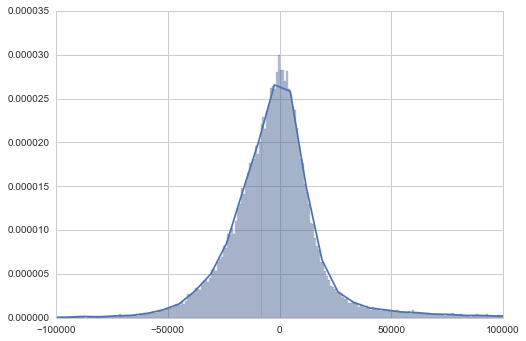

In [51]:
sns.distplot(results.resid, bins=1000)
plt.xlim((-100000, 100000))

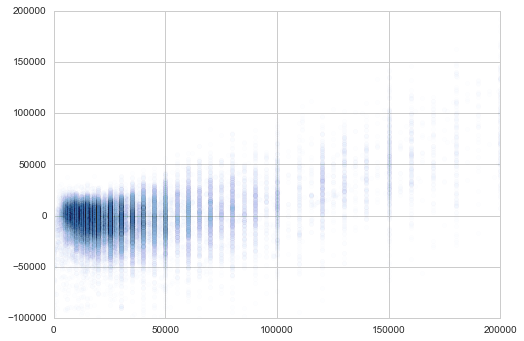

In [107]:
plt.scatter(y, results.resid, alpha=.01)
fig = plt.gcf()
plt.ylim((-100000, 200000))
plt.xlim((0, 200000))
plt.figure(figsize=(3,5))

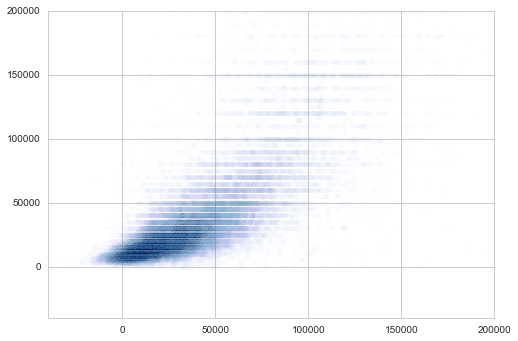

In [101]:
plt.scatter(results.predict(X), y, alpha=.01)
plt.xlim((-40000, 200000))
plt.ylim((-40000, 200000))
plt.figure(figsize=(2,2))

## Cross validate model

In [391]:
def get_folds(X, y, k):
    '''
    Generator that yields k-folds of training and testing datasets.
    '''
    for train_ix, test_ix in cross_validation.KFold(X.shape[0], n_folds=k):
        X_train = X[train_ix]
        y_train = y[train_ix]
        X_test = X[test_ix]
        y_test = y[test_ix]
        yield (X_train, y_train, X_test, y_test)

        
def cross_validate(X, y, k):
    '''
    Generator that performs k-fold cross-validation on
    model and yields r2 scores.
    '''
    # Loop through folds of training/testing sets.
    for X_train, y_train, X_test, y_test in get_folds(X, y, k):
        # Train OLS regression on training set.
        results = sm.OLS(y_train, X_train).fit()
        # Predict testing set using model.
        y_test_pred = results.predict(X_test)
        # Evaluate model predictions with R2 score.
        yield metrics.r2_score(y_test, y_test_pred)

        
def fit_and_eval_model(X, y, k=10):
    '''Collect r2 scores from k-fold cross validation.'''
    return [r2 for r2 in cross_validate(X, y, k)]

In [408]:
scores = fit_and_eval_model(X.as_matrix(), y.as_matrix(), k=10)
scores

[0.76368019906245532,
 -31399756570339.969,
 0.44333959064008543,
 -90349721697718560.0,
 0.05675847701959158,
 -563336548372.34229,
 0.14956460680851613,
 -7744496372696178.0,
 -1.0924695035909698e+19,
 -8.9093298673841984e+17]

In [409]:
np.array(scores).mean()

-1.1913754203811651e+18

## Model with meters squared

In [339]:
# Specify model with meters squared.
formula_meters_squared = base_formula + ' + meters_squared + ' + amenities_formula
y_meters, X_meters = dmatrices(formula_meters_squared, data=listings, return_type='dataframe')

In [341]:
# Regress price on all variables in first model, plus meters squared.
model_meters = sm.OLS(y_meters, X_meters)
results_meters = model_meters.fit()

# Print regression diagnostics.
print(results_meters.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     68.94
Date:                Sun, 31 Jan 2016   Prob (F-statistic):               0.00
Time:                        21:55:20   Log-Likelihood:                -94787.
No. Observations:                7986   AIC:                         1.899e+05
Df Residuals:                    7809   BIC:                         1.912e+05
Df Model:                         176                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------

## Log model

In [108]:
log_model = sm.OLS(np.log(y), X)
log_results = log_model.fit()
print(log_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     279.4
Date:                Mon, 01 Feb 2016   Prob (F-statistic):               0.00
Time:                        01:35:08   Log-Likelihood:                -44164.
No. Observations:               47350   AIC:                         8.876e+04
Df Residuals:                   47134   BIC:                         9.065e+04
Df Model:                         215                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------

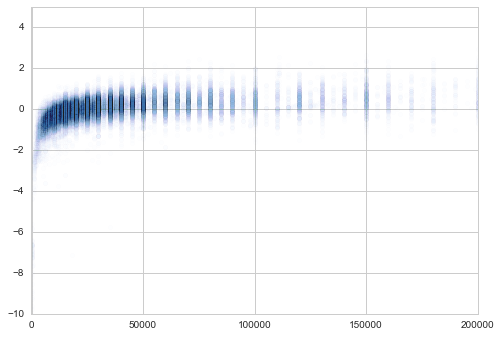

In [114]:
plt.scatter(y, log_results.resid, alpha=.01)
fig = plt.gcf()
plt.ylim((-10, 5))
plt.xlim((-100, 200000))
plt.figure(figsize=(3,5))